In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from plotly import tools 
import chart_studio.plotly as py
import plotly.graph_objs as go 
import gc 
import matplotlib.pyplot as plt 
import seaborn as sns

In [7]:
import os
print(os.listdir())

['.ipynb_checkpoints', 'BTC_Weekly.csv', 'Untitled.ipynb', 'Untitled1.ipynb']


# Data Exploration


In [25]:
data = pd.read_csv('btc_daily.csv',encoding='utf-8')
data.head()

,Date,Open,High,Low,Close,Volume,Market_Cap
0,28-Sep-23,"$26,355.81","$27,259.50","$26,327.32","$27,021.55","$14,079,002,707","$526,883,682,824"
1,27-Sep-23,"$26,209.50","$26,817.84","$26,111.46","$26,352.72","$11,718,380,997","$513,818,515,485"
2,26-Sep-23,"$26,294.76","$26,389.88","$26,090.71","$26,217.25","$9,985,498,161","$511,151,155,987"
3,25-Sep-23,"$26,253.78","$26,421.51","$26,011.47","$26,298.48","$11,997,833,257","$512,712,185,602"
4,24-Sep-23,"$26,579.37","$26,716.06","$26,221.05","$26,256.83","$8,192,867,686","$511,876,976,254"


In [32]:
data['Date']

Date
2023-09-28   2023-09-28
2023-09-27   2023-09-27
2023-09-26   2023-09-26
2023-09-25   2023-09-25
2023-09-24   2023-09-24
                ...    
2023-06-04   2023-06-04
2023-06-03   2023-06-03
2023-06-02   2023-06-02
2023-06-01   2023-06-01
2023-05-31   2023-05-31
Name: Date, Length: 121, dtype: datetime64[ns]

In [37]:
# convert the date column into a datetime object
data['Date'] = pd.to_datetime(data['Date'])

# extract the day, month, and year components
data['day'] = data['Date'].dt.day
data['month'] = data['Date'].dt.month
data['year'] = data['Date'].dt.year

# show the modified data frame
print(data)


                 Date         Open         High          Low        Close  \
Date                                                                        
2023-09-28 2023-09-28  $26,355.81   $27,259.50   $26,327.32   $27,021.55    
2023-09-27 2023-09-27  $26,209.50   $26,817.84   $26,111.46   $26,352.72    
2023-09-26 2023-09-26  $26,294.76   $26,389.88   $26,090.71   $26,217.25    
2023-09-25 2023-09-25  $26,253.78   $26,421.51   $26,011.47   $26,298.48    
2023-09-24 2023-09-24  $26,579.37   $26,716.06   $26,221.05   $26,256.83    
...               ...          ...          ...          ...          ...   
2023-06-04 2023-06-04  $27,075.12   $27,407.02   $26,968.22   $27,119.07    
2023-06-03 2023-06-03  $27,252.32   $27,317.05   $26,958.00   $27,075.13    
2023-06-02 2023-06-02  $26,824.56   $27,303.86   $26,574.64   $27,249.59    
2023-06-01 2023-06-01  $27,218.41   $27,346.11   $26,671.72   $26,819.97    
2023-05-31 2023-05-31  $27,700.53   $27,831.68   $26,866.45   $27,219.66    

In [38]:
data.head()

,Date,Open,High,Low,Close,Volume,Market_Cap,day,month,year
Date,,,,,,,,,,
2023-09-28,2023-09-28,"$26,355.81","$27,259.50","$26,327.32","$27,021.55","$14,079,002,707","$526,883,682,824",28,9,2023
2023-09-27,2023-09-27,"$26,209.50","$26,817.84","$26,111.46","$26,352.72","$11,718,380,997","$513,818,515,485",27,9,2023
2023-09-26,2023-09-26,"$26,294.76","$26,389.88","$26,090.71","$26,217.25","$9,985,498,161","$511,151,155,987",26,9,2023
2023-09-25,2023-09-25,"$26,253.78","$26,421.51","$26,011.47","$26,298.48","$11,997,833,257","$512,712,185,602",25,9,2023
2023-09-24,2023-09-24,"$26,579.37","$26,716.06","$26,221.05","$26,256.83","$8,192,867,686","$511,876,976,254",24,9,2023


In [63]:
df_day = data.day
df_month = data.month.mean()
df_year = data.year.mean() 

In [76]:
data.Market_Cap

day
28    $526,883,682,824 
27    $513,818,515,485 
26    $511,151,155,987 
25    $512,712,185,602 
24    $511,876,976,254 
            ...        
4     $525,920,232,791 
3     $525,043,616,808 
2     $528,404,436,446 
1     $520,044,966,564 
31    $527,773,175,252 
Name: Market_Cap, Length: 121, dtype: object

C:\Users\LENOVO\AppData\Local\Programs\Python\Python311\Lib\site-packages\_plotly_utils\basevalidators.py:105: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



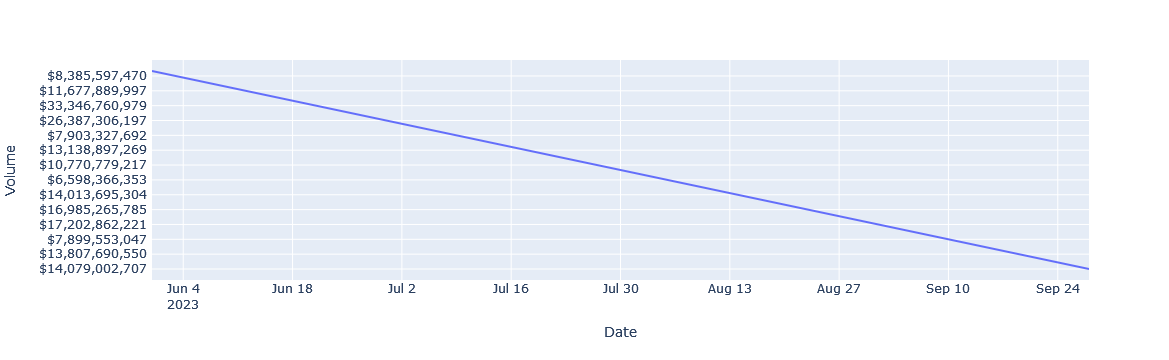

In [93]:
import plotly.express as px
fig = px.line(data, x='Date', y="Volume")
fig.show()

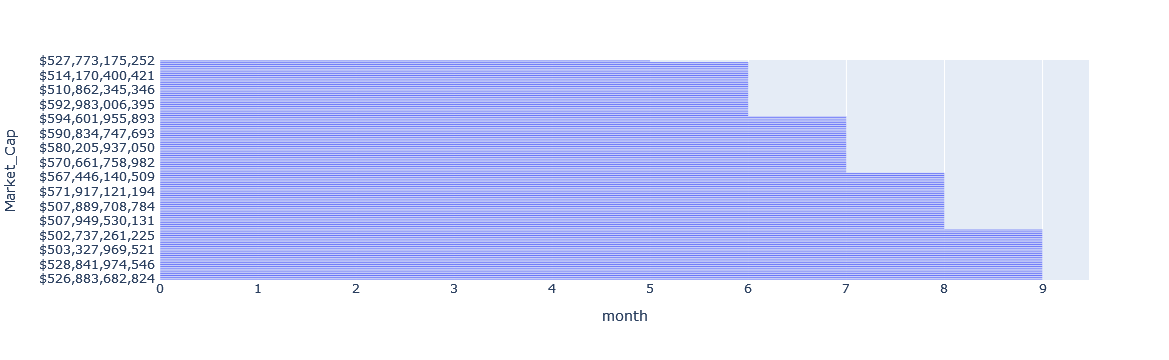

In [100]:
fig = px.bar(data, x='month', y='Market_Cap')
fig.show()

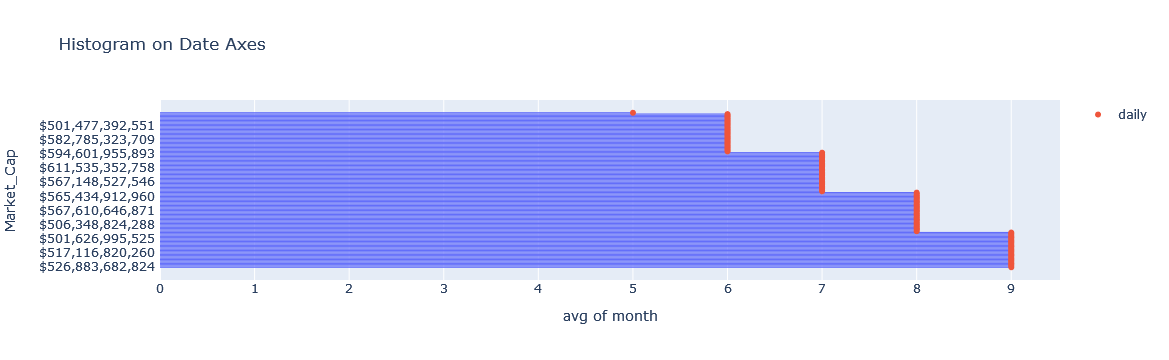

In [106]:
fig = px.histogram(data, x="month", y="Market_Cap", histfunc="avg", title="Histogram on Date Axes")
fig.update_traces(xbins_size="M1")
fig.update_xaxes(showgrid=True, ticklabelmode="period", dtick="M1", tickformat="%b\n%Y")
fig.update_layout(bargap=0.1)
fig.add_trace(go.Scatter(mode="markers", x=data["month"], y=data['Market_Cap'], name="daily"))
fig.show()

In [114]:
fig = go.Figure()

fig.add_trace(go.Bar(
    x=['month'],
    y=['Volume'],
    xperiod="M3",
    xperiodalignment="middle",
    xhoverformat="Q%q",
    hovertemplate="%{m}%{_xother}"
))

fig.add_trace(go.Scatter(
    x=["Month"],
    y=['Market_Cap'],
    xperiod="M3",
    xperiodalignment="middle",
    hovertemplate="%{m}%{_xother}"
))

fig.update_layout(hovermode="x unified")
fig.show()

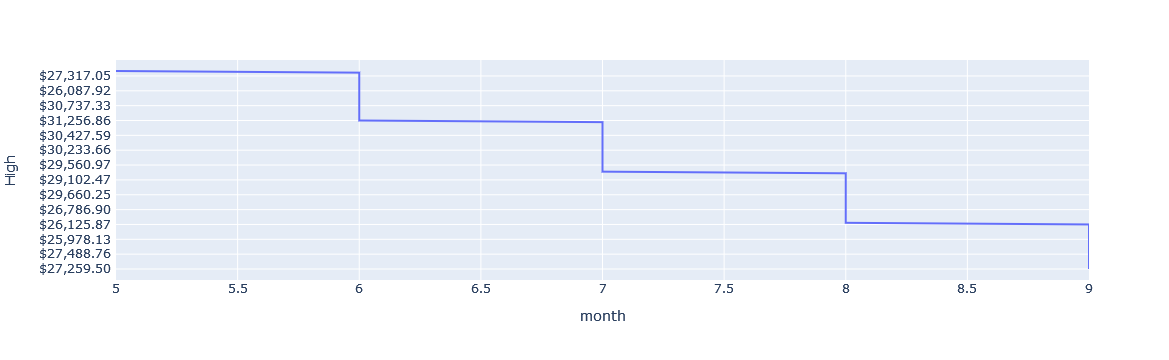

In [118]:
fig = px.line(data, x='month', y='High', range_x=['2023-07-01','2023-9-30'])
fig.show()

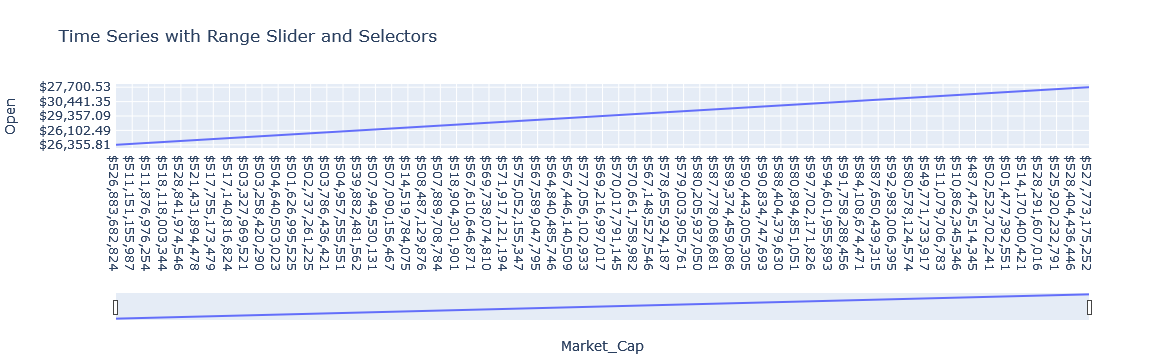

In [124]:
fig = px.line(data, x='Market_Cap', y='Open', title='Time Series with Range Slider and Selectors')

fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=1, label="1m", step="month", stepmode="backward"),
            dict(count=6, label="6m", step="month", stepmode="backward"),
            dict(count=1, label="YTD", step="year", stepmode="todate"),
            dict(step="all")
        ])
    )
)